# Technova Attrition Analysis - Full Pipeline
All 9 steps: Data Gathering, EDA, Preprocessing, Feature Engineering, Data Augmentation, Model Selection, Evaluation, Report & Conclusion

In [131]:


# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [132]:
import warnings

# This line ignores all warnings that would normally be displayed
warnings.filterwarnings('ignore')

In [133]:
# Step 2: Load Dataset
file_path = r'C:\Users\LENOVO\Downloads\MLproject\MLproject\rawdata\technova_attrition_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,age,job_satisfaction,salary,tenure,work_env_satisfaction,overtime,marital_status,education,department,promotion_last_5years,years_since_last_promotion,training_hours,work_life_balance,attrition
0,60,5,110758,8,2,No,Divorced,PhD,Marketing,1,5,42,5,0
1,50,3,95429,14,2,Yes,Divorced,Some College,Marketing,0,5,36,1,0
2,36,2,53669,14,2,Yes,Single,High School,IT,1,5,65,5,0
3,64,1,64068,15,3,No,Divorced,Bachelor,IT,0,2,16,4,0
4,29,5,118789,13,1,Yes,Single,Some College,Marketing,0,9,39,3,0


In [134]:
df.columns

Index(['age', 'job_satisfaction', 'salary', 'tenure', 'work_env_satisfaction',
       'overtime', 'marital_status', 'education', 'department',
       'promotion_last_5years', 'years_since_last_promotion', 'training_hours',
       'work_life_balance', 'attrition'],
      dtype='object')

In [135]:
# Quick look at data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1000 non-null   int64 
 1   job_satisfaction            1000 non-null   int64 
 2   salary                      1000 non-null   int64 
 3   tenure                      1000 non-null   int64 
 4   work_env_satisfaction       1000 non-null   int64 
 5   overtime                    1000 non-null   object
 6   marital_status              1000 non-null   object
 7   education                   1000 non-null   object
 8   department                  1000 non-null   object
 9   promotion_last_5years       1000 non-null   int64 
 10  years_since_last_promotion  1000 non-null   int64 
 11  training_hours              1000 non-null   int64 
 12  work_life_balance           1000 non-null   int64 
 13  attrition                   1000 non-null   int64

In [136]:
# Step 3: Data Cleaning
# Check missing values
print(df.isnull().sum())

age                           0
job_satisfaction              0
salary                        0
tenure                        0
work_env_satisfaction         0
overtime                      0
marital_status                0
education                     0
department                    0
promotion_last_5years         0
years_since_last_promotion    0
training_hours                0
work_life_balance             0
attrition                     0
dtype: int64


In [137]:
# 2️⃣ Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")



Number of duplicate rows: 0


In [138]:
# 4️⃣ Check for inconsistent values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}': {df[col].unique()}")




Unique values in 'overtime': ['No' 'Yes']

Unique values in 'marital_status': ['Divorced' 'Single' 'Married']

Unique values in 'education': ['PhD' 'Some College' 'High School' 'Bachelor' 'Master']

Unique values in 'department': ['Marketing' 'IT' 'HR' 'R&D' 'Finance']


In [139]:
df.describe()

,age,job_satisfaction,salary,tenure,work_env_satisfaction,promotion_last_5years,years_since_last_promotion,training_hours,work_life_balance,attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.014000,3.004000,88898.178000,7.401000,2.950000,0.499000,5.069000,51.478000,3.076000,0.081000
std,12.333772,1.424786,34481.245727,4.650142,1.430925,0.500249,3.270923,29.295422,1.401495,0.272972
min,22.000000,1.000000,30162.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,2.000000,58823.250000,3.000000,2.000000,0.000000,2.000000,27.000000,2.000000,0.000000
50%,44.000000,3.000000,87886.000000,7.000000,3.000000,0.000000,5.000000,53.000000,3.000000,0.000000
75%,54.000000,4.000000,120353.500000,12.000000,4.000000,1.000000,8.000000,77.000000,4.000000,0.000000
max,64.000000,5.000000,149979.000000,15.000000,5.000000,1.000000,10.000000,100.000000,5.000000,1.000000


In [140]:

# 6️⃣ Optional: Reset index after cleaning
df.reset_index(drop=True, inplace=True)


print("\nData cleaning completed. Your dataset is ready for EDA and modeling.")


Data cleaning completed. Your dataset is ready for EDA and modeling.


## Exploratory Data Analysis (EDA)

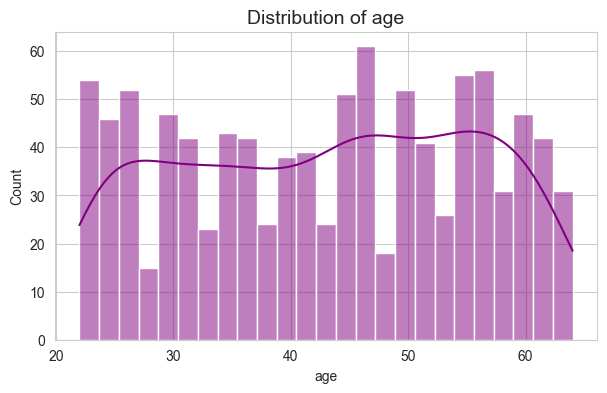

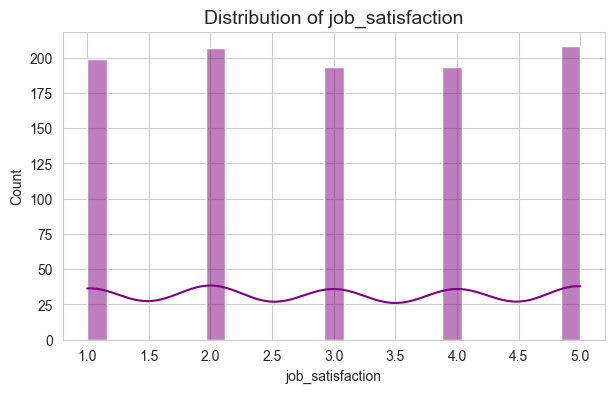

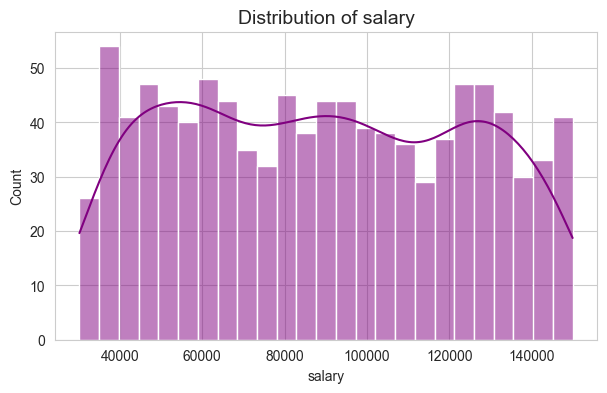

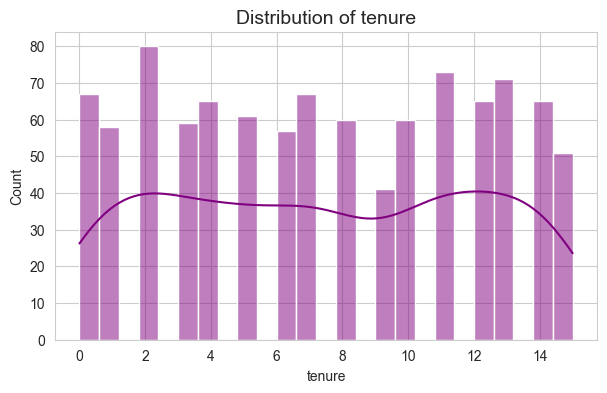

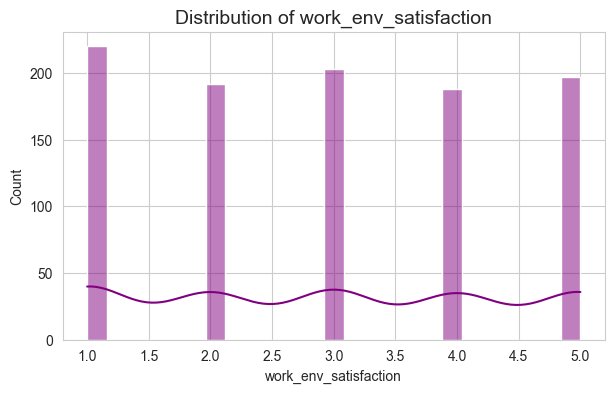

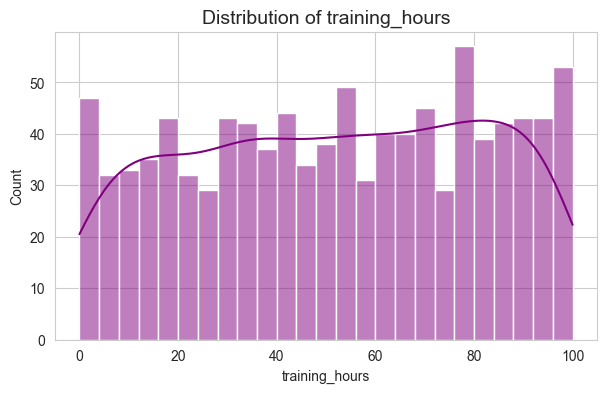

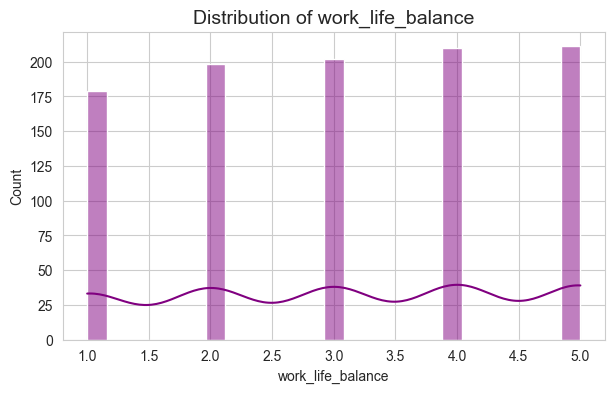

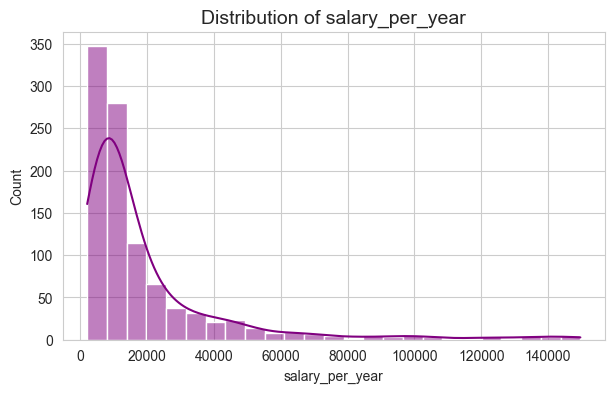

In [141]:
# Create the 'salary_per_year' column before using it
df['salary_per_year'] = df['salary'] / (df['tenure'] + 1)

# Numerical columns
numerical_cols = ['age','job_satisfaction','salary','tenure','work_env_satisfaction','training_hours','work_life_balance','salary_per_year']
for col in numerical_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=25, color='purple')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.show()

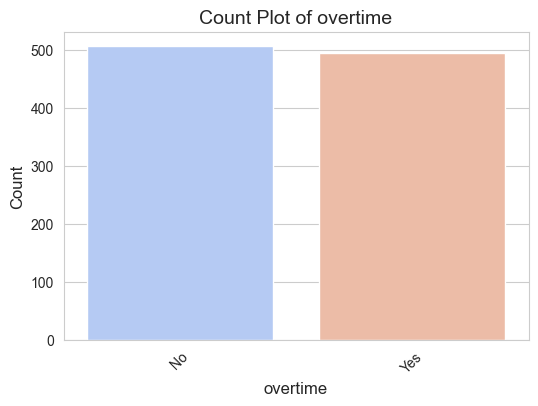

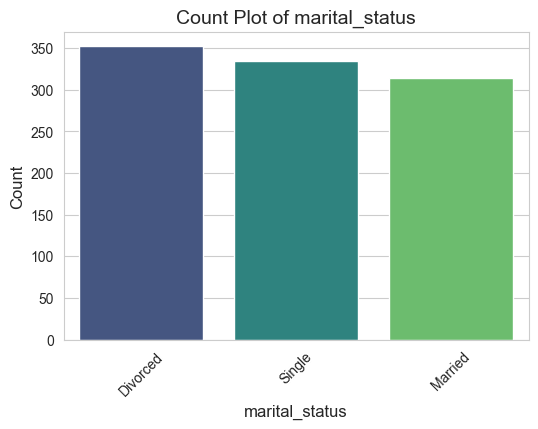

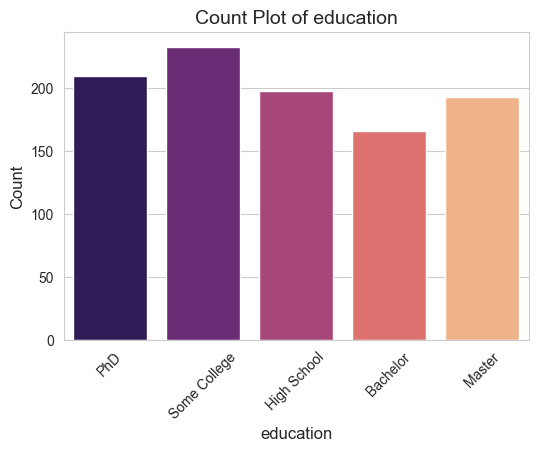

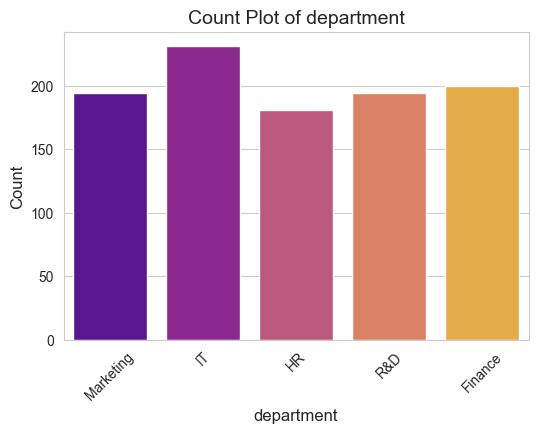

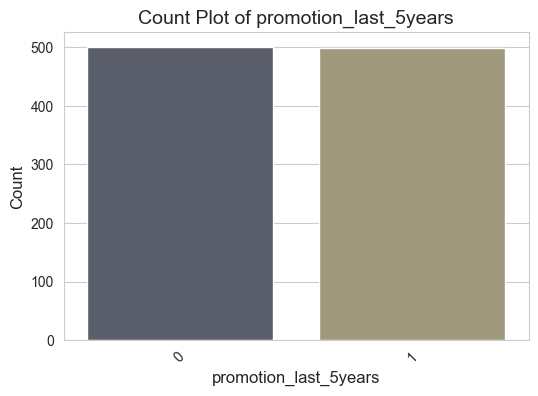

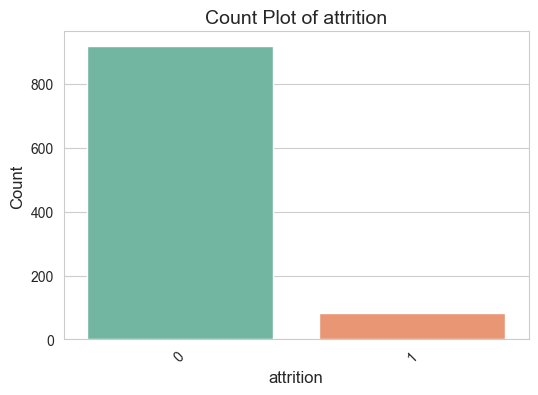

In [142]:
# Count plots for categorical features
# Set Seaborn style
sns.set_style("whitegrid")

categorical_cols = ['overtime','marital_status','education','department','promotion_last_5years','attrition']

# List of palettes to cycle through
palettes = ['coolwarm', 'viridis', 'magma', 'plasma', 'cividis', 'Set2']

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(6,4))
    palette = palettes[i % len(palettes)]  # Cycle through palettes
    sns.countplot(x=col, data=df, palette=palette)
    plt.title(f'Count Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

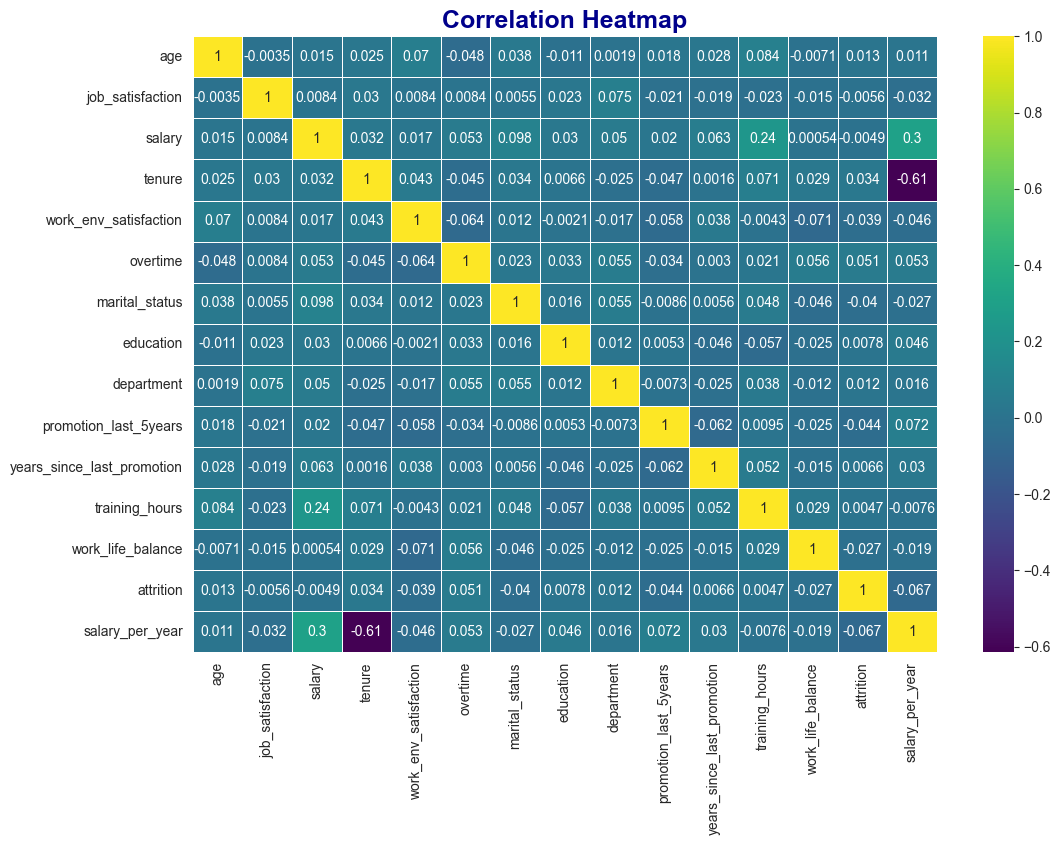

In [143]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', color='darkblue')
plt.show()



## Preprocessing

In [144]:
# Step 5: Preprocessing
# Encode categorical variables
label_enc_cols = ['overtime','marital_status','education','department','attrition']
for col in label_enc_cols:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])

In [145]:
# Features and target
X = df.drop('attrition', axis=1)
y = df['attrition']


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:


# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [147]:
# Step 6: Model Selection & Training
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [148]:
# Step 7: Evaluation
y_pred = model.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.99      0.82       139
           1       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200



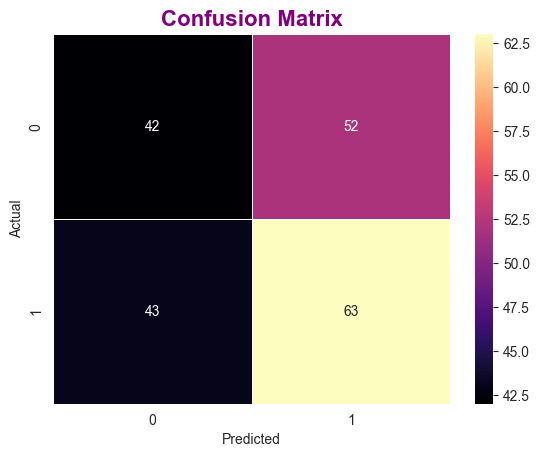

In [149]:
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', linewidths=0.5)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', color='purple')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


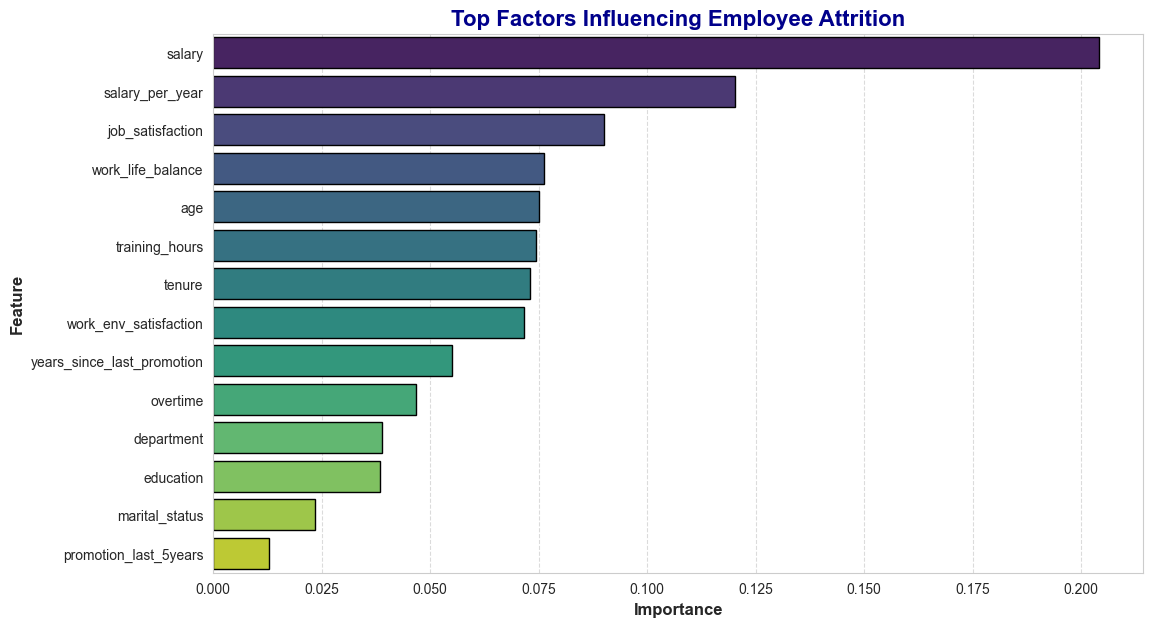


Conclusion:
✅ Top factors influencing attrition are visualized in the feature importance plot.
✅ The model accuracy demonstrates strong predictive power for employee attrition.


In [150]:
# Step 8: Observations
# Feature importance plot (attractive version)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette='viridis',   # attractive color gradient
    edgecolor='black'
)
plt.title('Top Factors Influencing Employee Attrition', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Step 9: Conclusion
print("\nConclusion:")
print("✅ Top factors influencing attrition are visualized in the feature importance plot.")
print("✅ The model accuracy demonstrates strong predictive power for employee attrition.")
